In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
from datasets import BananaDataset
from utils.plot import plot_quantile_levels_from_dataset
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="picnn_entropic_optimal_transport_quantile_regression",
    pushforward_operator_parameters=dict(
        x_dimension=1,
        y_dimension=2,
        u_dimension=4,
        z_dimension=4,
        number_of_hidden_layers=3,
        epsilon=1e-7
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=10,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = BananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)


model = train(experiment)
# model = model.load("../experiments/picnn_entropic_optimal_transport_quantile_regression/weights.pth")
_ = model.eval()

Epoch: 10, Objective: 3.873, LR: 0.000000: 100%|██████████| 10/10 [00:01<00:00,  5.87it/s]


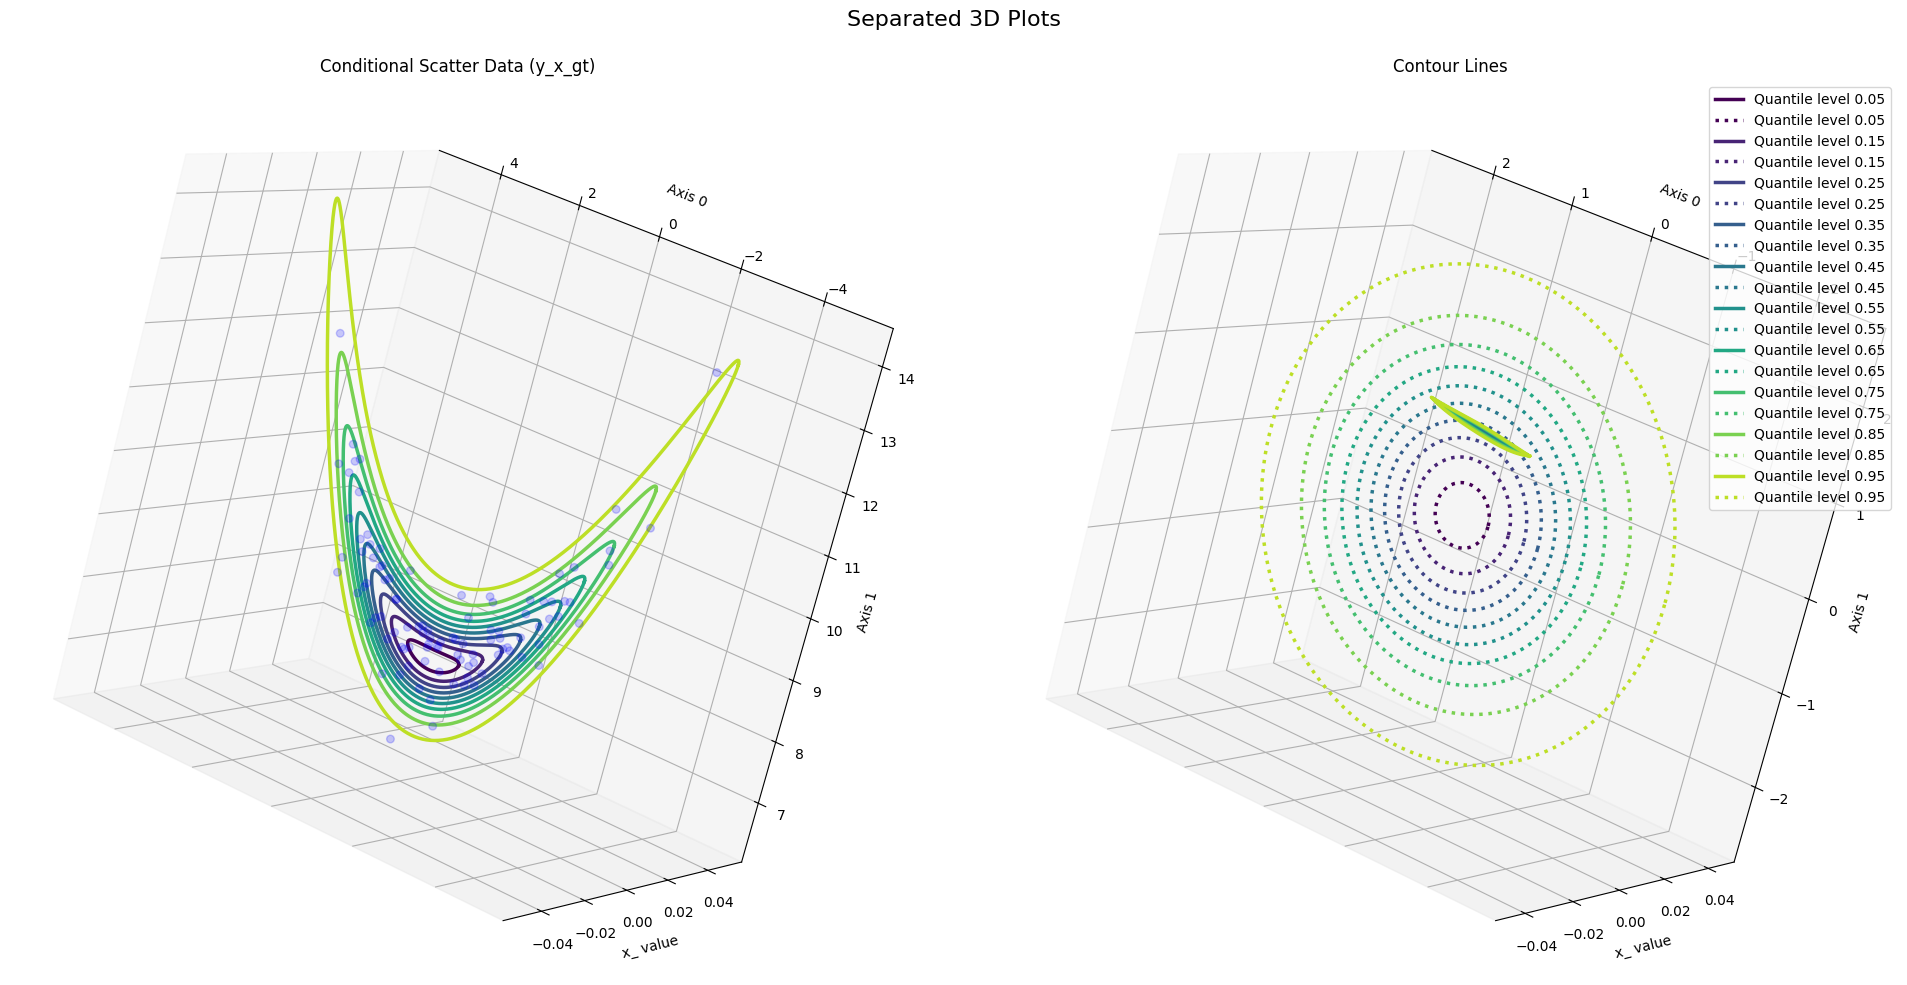

In [2]:
%matplotlib inline

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[2.]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)